<style type="text/css">
    h1,h2,h3,h4{
        margin-bottom: 0px;
    }
    p,ul{
        margin-bottom: 20px;
    }
    h2{
        margin-left: 10px;
        margin-top: 15px;
    }
    h3{
        margin-left: 20px;
        margin-top: 10px;
    }
    h4{
        margin-left: 30px;
        margin-top: 10px;
    }
    p{
        margin-left: 40px;
        margin-top: 7px;
    }
    li{
        margin-left: 40px;
        margin-top: 5px;
    }
</style>

<h1>Data Mining - Clustering Techniques</h1>
<h2>Part I: Research Question</h2>
<h3>A. Purpose of Data Mining Report</h3>
<h4>1. Proposal of Question</h4>
<p>&nbsp; &nbsp; What natural groupings in customer characteristics can be discovered using a
hierarchical clustering technique?</p>
<h4>2. Defined Goal</h4>
<p>&nbsp; &nbsp; The goal of the analysis is to discover subsets of customers composed of distinct
characteristics. Determining different groups of customer profiles could help the business
with targeted marketing, providing special discounts, and estimating long-term revenue
based on what cluster a new customer might align with.</p>

<h2>Part II: Technique Justification</h2>
<h3>B. Reasoning</h3>
<h4>1. Explanation of the Clustering Technique</h4>
<p>&nbsp; &nbsp; Hierarchical clustering begins by treating every data point as a cluster, finds the
points with the smallest distance, then combines them into a new cluster. This process is
repeated for every generated cluster until all of the data is combined into one big cluster.
Linkage is the process “for measuring the distance between two sub-clusters of data
points” and is the determining factor for which data points get clustered together based on
their similarity (GeeksforGeeks, 2024). The hierarchical algorithm in this project will use
ward linkage which minimizes variance between clusters in addition to a euclidean
distance metric. This technique enables the creation of a dendrogram that demonstrates
the connections between clusters and can be used in determining the optimal number of
customer groups in the data set. I believe this analysis will reveal relational characteristics
about certain kinds of customers that the telecommunications company can use to their
advantage.</p>
<h4>2. Summary of the Technique Assumption</h4>
<p>&nbsp; &nbsp; A hierarchical cluster analysis is performed under the assumption of no “significant
outliers” in the data set (SPSS, n.d.). Outliers can negatively affect the clustering of data in
such ways that a cluster could be composed of just outliers with an incredibly small
number of data points (Tambe, 2019). Additionally, the presence of outliers can lead to
some data points being clustered that normally would be represented in separate
groupings. Being a distance-based metric, it is important that values within the data have
similar distances for improved clustering accuracy which is why it is assumed that outliers
are absent from the data set.</p>
<h4>3. Libraries List</h4>
<p><ul>
<li>Pandas - Stores, manipulates, and reads large sets of data. Enables the storage of
‘churn_clean.csv’ as a variable.</li>
<li>Seaborn - Used to generate graphs of the data including the count plots and histograms
of the selected features.</li>
<li>Matplotlib.pyplot - Allows the visualization of the graphs generated from the seaborn plots. In
this project it is used to display the hierarchical dendrogram, and the
subplots of every selected feature.</li>
<li>Scipy.cluster.hierarchy - This library conducts the actual hierarchical clustering of data and generates
the dendrogram.</li>
<li>Sklearn.preprocessing - In the data preparation phase, this library is used to scale the data so
numeric values were measurably closer together. The values of ‘Income’ in
contrast to the values of ‘Children’ would have too big a gap otherwise.</li>
<li>Sklearn.cluster - Also computes a hierarchical analysis that contains the cluster label for
every data point. Labeling the data points enabled the creation of subplots
for every cluster.</li>
<li>Sklearn.metrics - Used in the computation of the silhouette score of the clustering.</li>
</ul></p>

<h2>Part III: Data Preparation</h2>
<h3>C. Data Preparation Process</h3>
<h4>1. Data Preprocessing</h4>
<p>&nbsp; &nbsp; When performing a hierarchical cluster, the distance between variables is
measured. Because of this, all variables included in the analysis must be in a compatible
format for mathematical calculations. As described in the following section, some of the
variables that will be used in this project are categorical and must be one hot encoded for
the algorithm to run. One hot encoding will represent the categorical options as numbers,
for example, converting the gender column values ‘Female’, ‘Male’, and ‘Nonbinary’ into ‘0’,
‘1’, and ‘2’. Using the ‘get_dummies()’ function from the pandas library, I will one hot encode
the ‘Gender’, ‘Marital’, and ‘Techie’ columns.</p>
<h4>2. Data Set Variables</h4>
<p>&nbsp; &nbsp; The variables used in this analysis were selected based on information provided
when signing up as these values are directly sourced from the customer as well as the
customer’s monthly charge as that is what the business is funded by. Stakeholders will not
only want to know who the customers are, but how they are contributing to the company.
<ul>
<li>Children<ul>
<li>Data Type: Continuous</li>
<li>Description: The number of children a customer has obtained from their
sign-up information.</li></ul>
<li>Age<ul>
<li>Data Type: Continuous</li>
<li>Description: A customer’s age obtained from their sign-up information.</li></ul>
<li>Income<ul>
<li>Data Type: Continuous</li>
<li>Description: A customer’s annual income obtained from their sign-up
information.</li></ul>
<li>Marital<ul>
<li>Data Type: Categorical</li>
<li>Description: A customer’s marital status obtained from their sign-up
information.</li></ul>
<li>Gender<ul>
<li>Data Type: Categorical</li>
<li>Description: A customer’s gender self-identification obtained from their sign-
up information.</li></ul>
<li>Techie<ul>
<li>Data Type: Categorical</li>
<li>Description: If a customer believes themselves to be technologically inclined
obtained from a sign-up customer questionnaire.</li></ul>
<li>MonthlyCharge<ul>
<li>Data Type: Continuous</li>
<li>Description: The customer’s average monthly payment charge.</li></ul>
</ul></p>
<h4>3. Steps for Analysis</h4>
<p>&nbsp; &nbsp; My preparation process for this dataset includes cleaning the entire database,
followed by filtering for relevant data, and then finally one hot encoding and standardizing
the relevant variables.

&nbsp; &nbsp; The cleaning process begins by determining if any duplicate cells or rows are
present within the data. ‘CaseOrder’, ‘Customer_id’ and ‘Interaction’ are the only columns
that require a duplicate check because every value in these columns must be unique. This
operation resulted in no duplicates present in the database.
</p>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
 

class text:
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

# specifying the n/a values will allow us to keep the 'None' value in InternetService
df = pd.read_csv('churn_clean.csv', keep_default_na = False, 
                 na_values = [' ', '#N/A', '#N/A N/A', '#NA', '-1.#IND', '-1.#QNAN', '-NaN', '-nan', '1.#IND', '1.#QNAN',
                             '<NA>', 'N/A', 'NA', 'NULL', 'NaN', 'n/a', 'nan', 'null'])
# aligns the df index to match the index of CaseOrder so df[0] doesn't exist
df.index = df.index + 1

print (text.BOLD + "\n-- Begin Data Analytics --\n" + text.END)
# Duplicates
def detect_duplicates(col_name):
   """Detect Duplicates: 
      Detects duplicate values in a single column.
   """
   print(f"{col_name}: ",  df.duplicated(subset = col_name).sum())
print(text.UNDERLINE + "Detecting Duplicates" + text.END)
print("Exact row: ", len(df)-len(df.drop_duplicates()))
detect_duplicates('CaseOrder');
detect_duplicates('Customer_id');
detect_duplicates('Interaction');
df.drop_duplicates()


-- Begin Data Analytics --

Detecting Duplicates
Exact row:  0
CaseOrder:  0
Customer_id:  0
Interaction:  0


,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
1,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
2,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
3,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
4,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
5,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,9996,M324793,45deb5a2-ae04-4518-bf0b-c82db8dbe4a4,9499fb4de537af195d16d046b79fd20a,Mount Holly,VT,Rutland,5758,43.43391,-72.78734,...,159.979400,6511.252601,3,2,3,3,4,3,2,3
9997,9997,D861732,6e96b921-0c09-4993-bbda-a1ac6411061a,c09a841117fa81b5c8e19afec2760104,Clarksville,TN,Montgomery,37042,36.56907,-87.41694,...,207.481100,5695.951810,4,5,5,4,4,5,2,5
9998,9998,I243405,e8307ddf-9a01-4fff-bc59-4742e03fd24f,9c41f212d1e04dca84445019bbc9b41c,Mobeetie,TX,Wheeler,79061,35.52039,-100.44180,...,169.974100,4159.305799,4,4,4,4,4,4,4,5
9999,9999,I641617,3775ccfc-0052-4107-81ae-9657f81ecdf3,3e1f269b40c235a1038863ecf6b7a0df,Carrollton,GA,Carroll,30117,33.58016,-85.13241,...,252.624000,6468.456752,4,4,6,4,3,3,5,4


<style type="text/css">
    h1,h2,h3,h4{
        margin-bottom: 0px;
    }
    p,ul{
        margin-bottom: 20px;
    }
    h2{
        margin-left: 10px;
        margin-top: 15px;
    }
    h3{
        margin-left: 20px;
        margin-top: 10px;
    }
    h4{
        margin-left: 30px;
        margin-top: 10px;
    }
    p{
        margin-left: 40px;
        margin-top: 7px;
    }
    li{
        margin-left: 40px;
        margin-top: 5px;
    }
</style>

<p>&nbsp; &nbsp; Using the ‘isna()’ and ‘sum()’ function, I detected that there were no blank values in
the data set.</p>

In [3]:
# Missing Values
print(text.UNDERLINE + "\nDetecting Missing Values" + text.END)
print(df.isna().sum())


Detecting Missing Values
CaseOrder               0
Customer_id             0
Interaction             0
UID                     0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
TimeZone                0
Job                     0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBil

<style type="text/css">
    h1,h2,h3,h4{
        margin-bottom: 0px;
    }
    p,ul{
        margin-bottom: 20px;
    }
    h2{
        margin-left: 10px;
        margin-top: 15px;
    }
    h3{
        margin-left: 20px;
        margin-top: 10px;
    }
    h4{
        margin-left: 30px;
        margin-top: 10px;
    }
    p{
        margin-left: 40px;
        margin-top: 7px;
    }
    li{
        margin-left: 40px;
        margin-top: 5px;
    }
</style>
<p>&nbsp; &nbsp; For the final cleaning step, I analyzed numeric variables for potential outliers based
on the source of the data. All census and business generated values seemed within
reasonable distributions as well as the ‘Age’ and ‘Children’ variables in the sign-up values.
The ‘Income’ column, however, contained a range of values that looked too large with a
minimum of 348.67 and a maximum of 258,900.70. To treat this outlier, I used the interquartile range method with a threshold of 1.5
which eliminated only 336 rows of outliers.</p>

In [4]:
# Outliers
def describe_vars(list_name, list):
   """Describe Vars: 
      Used to describe variables and to visually check for outliers. 


      Compare min and max to each other.
      Compare if 25% is close to min and if 75% is close to max.
      Consider where the information was obtained.
   """
   print(f"{list_name} Values")
   print(str(df[list].describe()) + "\n")
def treat_outliers(col):
   """Treat Outliers: 
      Used to treat outliers using IQR. 
   """
   q1 = df[col].quantile(0.25)
   q3 = df[col].quantile(0.75)
   iqr = q3 - q1
   outliers = df[(df[col] < q1 - 1.5 * iqr) | (df[col] > q3 + 1.5 * iqr)]
   print(f"Outlier Count for {col}: {len(outliers)}")
   df.drop(outliers.index, inplace=True)
   print(f"New dataframe length: {len(df)}\n" )
   print(str(df[col].describe()))
   
census_list = ['Population']
signup_list = ['Age', 'Children', 'Income']
business_list = ['Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 
                'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']
print(text.UNDERLINE + "\nDetecting Outliers" + text.END)
describe_vars("Census", census_list);
describe_vars("Sign-up", signup_list);
describe_vars("Business Generated", business_list);
print(text.UNDERLINE + "Treating Outliers" + text.END)
treat_outliers('Income')


Detecting Outliers
Census Values
          Population
count   10000.000000
mean     9756.562400
std     14432.698671
min         0.000000
25%       738.000000
50%      2910.500000
75%     13168.000000
max    111850.000000

Sign-up Values
                Age    Children         Income
count  10000.000000  10000.0000   10000.000000
mean      53.078400      2.0877   39806.926771
std       20.698882      2.1472   28199.916702
min       18.000000      0.0000     348.670000
25%       35.000000      0.0000   19224.717500
50%       53.000000      1.0000   33170.605000
75%       71.000000      3.0000   53246.170000
max       89.000000     10.0000  258900.700000

Business Generated Values
       Outage_sec_perweek         Email      Contacts  Yearly_equip_failure  \
count        10000.000000  10000.000000  10000.000000          10000.000000   
mean            10.001848     12.016000      0.994200              0.398000   
std              2.976019      3.025898      0.988466              0.63595

<style type="text/css">
    h1,h2,h3,h4{
        margin-bottom: 0px;
    }
    p,ul{
        margin-bottom: 20px;
    }
    h2{
        margin-left: 10px;
        margin-top: 15px;
    }
    h3{
        margin-left: 20px;
        margin-top: 10px;
    }
    h4{
        margin-left: 30px;
        margin-top: 10px;
    }
    p{
        margin-left: 40px;
        margin-top: 7px;
    }
    li{
        margin-left: 40px;
        margin-top: 5px;
    }
</style>
<p>&nbsp; &nbsp; Once the data was cleaned, I then filtered the data to keep only columns relevant to
the cluster analysis as described in the previous section.</p>

In [5]:
# filter data 
print(text.UNDERLINE + "\nFilter Data" + text.END)
cluster_cat = ['Marital', 'Gender', 'Techie']
cluster_num = ['Children', 'Age', 'Income', 'MonthlyCharge']
filtered_df = df.filter(cluster_cat + cluster_num)
print("Excess Columns Removed. Remaining Columns:")
print(filtered_df.columns.values)


Filter Data
Excess Columns Removed. Remaining Columns:
['Marital' 'Gender' 'Techie' 'Children' 'Age' 'Income' 'MonthlyCharge']


<style type="text/css">
    h1,h2,h3,h4{
        margin-bottom: 0px;
    }
    p,ul{
        margin-bottom: 20px;
    }
    h2{
        margin-left: 10px;
        margin-top: 15px;
    }
    h3{
        margin-left: 20px;
        margin-top: 10px;
    }
    h4{
        margin-left: 30px;
        margin-top: 10px;
    }
    p{
        margin-left: 40px;
        margin-top: 7px;
    }
    li{
        margin-left: 40px;
        margin-top: 5px;
    }
</style>
<p>&nbsp; &nbsp; Next I standardized all the numeric columns so they have similar weights when the
clustering is performed.</p>

In [6]:
# standardize numeric data [In-Text Citation: (GeeksforGeeks, 2021)]
scaler = StandardScaler()
# Convert array back into dataframe [In-Text Citation: (dmmmmd & FBruzzesi, 2020)]
standard_df = pd.DataFrame(scaler.fit_transform(df.filter(cluster_num)), columns = cluster_num)
# Recombine numeric data with categorical; make row count stay the same [In-Text Citation: (Rocketq & Lucky Suman, 2018)]
standard_df = pd.concat([standard_df.reset_index(drop=True), df.filter(cluster_cat).reset_index(drop=True)], axis=1)

<style type="text/css">
    h1,h2,h3,h4{
        margin-bottom: 0px;
    }
    p,ul{
        margin-bottom: 20px;
    }
    h2{
        margin-left: 10px;
        margin-top: 15px;
    }
    h3{
        margin-left: 20px;
        margin-top: 10px;
    }
    h4{
        margin-left: 30px;
        margin-top: 10px;
    }
    p{
        margin-left: 40px;
        margin-top: 7px;
    }
    li{
        margin-left: 40px;
        margin-top: 5px;
    }
</style>

<p>&nbsp; &nbsp; For the final step in the preparation process, I one hot encoded the ‘Marital’,
‘Gender’, and ‘Techie’ columns with the ‘get_dummies()’ function. The ‘Techie_No’ column
was then dropped because its values only mirror the ‘Techie_Yes’ column. For this analysis
k dummy variables will be used instead of k-1 as k variables are suited for tree like models
like clustering (Gupta, 2019).</p>

In [7]:
# hot encode categorical data
encoded_df = pd.get_dummies(standard_df, dtype=int)
encoded_df.drop(['Techie_No' ], inplace=True, axis=1)
print("\nColumns Hot Encoded:")
print(encoded_df.columns.values)


Columns Hot Encoded:
['Children' 'Age' 'Income' 'MonthlyCharge' 'Marital_Divorced'
 'Marital_Married' 'Marital_Never Married' 'Marital_Separated'
 'Marital_Widowed' 'Gender_Female' 'Gender_Male' 'Gender_Nonbinary'
 'Techie_Yes']


<style type="text/css">
    h1,h2,h3,h4{
        margin-bottom: 0px;
    }
    p,ul{
        margin-bottom: 20px;
    }
    h2{
        margin-left: 10px;
        margin-top: 15px;
    }
    h3{
        margin-left: 20px;
        margin-top: 10px;
    }
    h4{
        margin-left: 30px;
        margin-top: 10px;
    }
    p{
        margin-left: 40px;
        margin-top: 7px;
    }
    li{
        margin-left: 40px;
        margin-top: 5px;
    }
</style>
<h4>4. Cleaned Data Set</h4>
<p>&nbsp; &nbsp; The copy of the cleaned data set is labelled ‘churn_prepared.csv’.</p>

In [8]:
# save to file
encoded_df.to_csv('churn_prepared.csv', index=False)
print("\nTransformations complete. File saved as 'churn_prepared.csv'")


Transformations complete. File saved as 'churn_prepared.csv'


<style type="text/css">
    h1,h2,h3,h4{
        margin-bottom: 0px;
    }
    p,ul{
        margin-bottom: 20px;
    }
    h2{
        margin-left: 10px;
        margin-top: 15px;
    }
    h3{
        margin-left: 20px;
        margin-top: 10px;
    }
    h4{
        margin-left: 30px;
        margin-top: 10px;
    }
    p{
        margin-left: 40px;
        margin-top: 7px;
    }
    li{
        margin-left: 40px;
        margin-top: 5px;
    }
</style>
<h2>Part IV: Analysis</h2>
<h3>D. Analysis and Results</h3>
<h4>1. Output and Intermediate Calculations</h4>
<p>&nbsp; &nbsp; After having conducted the hierarchical cluster, I displayed the results as a
dendrogram and used the cut-off method in addition to analyzing the silhouette score to
determine the best number of clusters. The cut off method entails looking for the longest
vertical line in the chart and drawing a horizontal line across the midpoint of the vertical
line. The longest vertical is chosen because it represents “more separation between the
clusters” meaning the clusters will show clearer, distinct values (Sampaio, 2023). I also
utilized the silhouette score to determine the quality of the clusters when the number of
clusters was increased or decreased. While the cut off method showed that over ten
clusters could be a good fit for the analysis, the silhouette score increased when four
clusters were used meaning four clusters was a better fit.</p>


Hierarchical Cluster Analysis


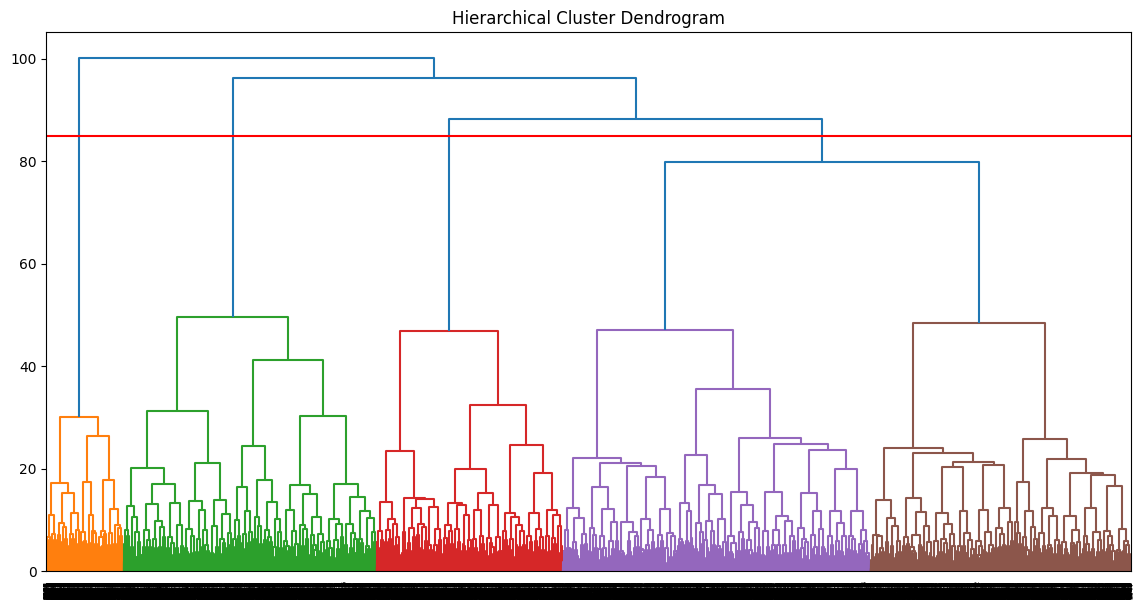


Customer Distribution in the Clusters:
         Count Percentage
Cluster                  
0         5061      52.4%
2         2251      23.3%
1         1659      17.2%
3          693       7.2%

Silhouette Score: 0.1082593539432193


In [10]:
# region Hiearchical Cluster
print(text.UNDERLINE + "\nHierarchical Cluster Analysis" + text.END)
plt.figure(figsize=(14, 7))
plt.title("Hierarchical Cluster Dendrogram")
# create the cluster/dendrogram [In-Text Citation: (Sampaio, 2023)]
h_cluster = shc.linkage(encoded_df, 
            method='ward', 
            metric="euclidean")
shc.dendrogram(Z=h_cluster)
plt.axhline(y = 85, color = 'r', linestyle = '-')
plt.show()

# Labels the cluster that the data points are in [In-Text Citation: (scikit-learn, n.d.)]
clustering_model = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
clustering_model.fit(encoded_df)
filtered_df['Cluster'] = clustering_model.labels_.tolist()
print("\nCustomer Distribution in the Clusters:")
# Print the count/percent of each cluster [In-Text Citation: (tenebris silentio & Dabas, 2021)]
print(pd.concat([filtered_df["Cluster"].value_counts(), 
                 filtered_df["Cluster"].value_counts(normalize=True).mul(100).round(1).astype(str)+'%'], 
                 axis=1, keys=["Count", "Percentage"]))
# silhouette score [In-Text Citation: (Bhardwaj, 2020)]
print(f"\nSilhouette Score: {silhouette_score(encoded_df, filtered_df['Cluster'])}")
# endregion

<style type="text/css">
    h1,h2,h3,h4{
        margin-bottom: 0px;
    }
    p,ul{
        margin-bottom: 20px;
    }
    h2{
        margin-left: 10px;
        margin-top: 15px;
    }
    h3{
        margin-left: 20px;
        margin-top: 10px;
    }
    h4{
        margin-left: 30px;
        margin-top: 10px;
    }
    p{
        margin-left: 40px;
        margin-top: 7px;
    }
    li{
        margin-left: 40px;
        margin-top: 5px;
    }
</style>
<h2>Part V: Data Summary and Implications</h2>
<h3>E. Summary</h3>
<h4>1. Quality of the Clustering Technique</h4>
<p>&nbsp; &nbsp; The quality of the clusters was determined by calculating the silhouette coefficient
of the dataset. This score describes “how similar an object is to its own cluster (cohesion)
compared to other clusters (separation)” where a value closer to 1 indicates distinct
clustering, 0 indicates clustering showing no significance or possibly overlapping and a
value closer to -1 signifies a poor or incorrect clustering of datapoints. This cluster analysis
had a score of 0.108 meaning that there is a little distinctness to the clusters, but there is
likely overlapping values to the groups.</p>
<h4>2. Results and Implications</h4>
<p>&nbsp; &nbsp; As alluded to in a previous section, I labeled the cluster of every data point used so I
could graph every selected feature by its cluster. It is important to note, however, that the
size of the clusters vary greatly so all charts are measured in percentages of values within
the cluster for better comparison. Here are the resulting histograms and count plots when
every selected feature is graphed:


Income
Cluster 0 Average: 28271.25
Cluster 1 Average: 67781.4
Cluster 2 Average: 32880.75
Cluster 3 Average: 36754.84


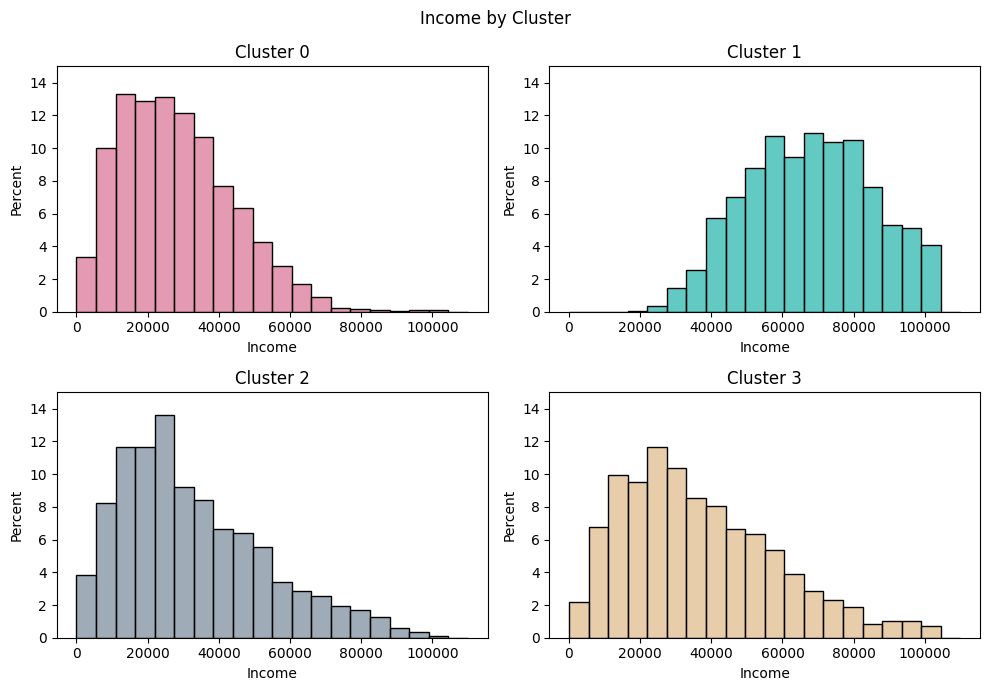


Age
Cluster 0 Average: 54.4
Cluster 1 Average: 49.0
Cluster 2 Average: 53.64
Cluster 3 Average: 51.78


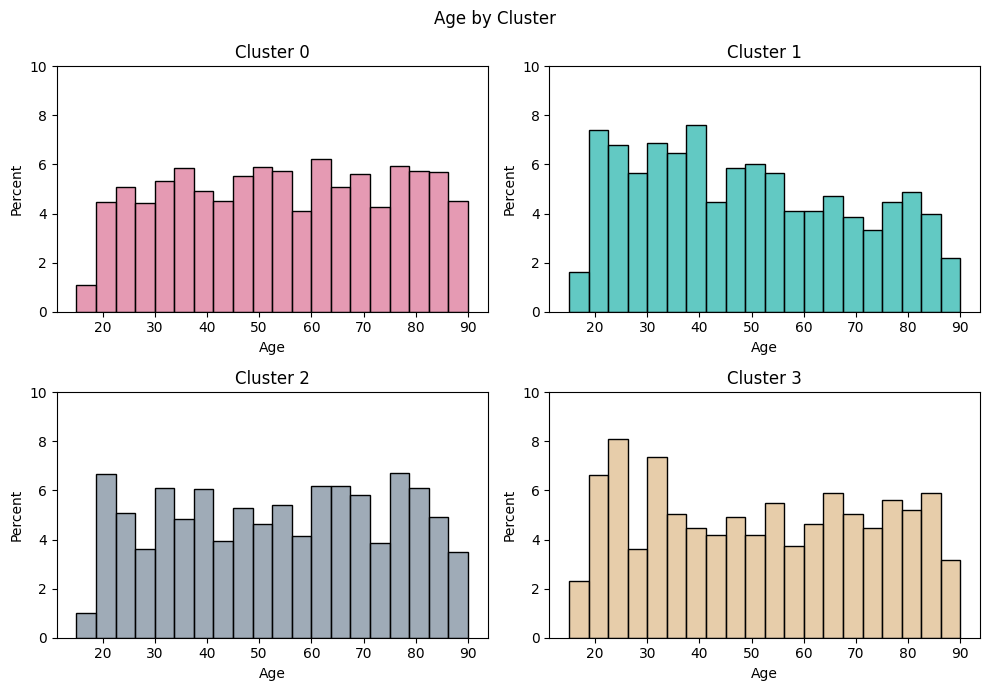


Children
Cluster 0 Average: 1.7
Cluster 1 Average: 1.44
Cluster 2 Average: 1.71
Cluster 3 Average: 7.65


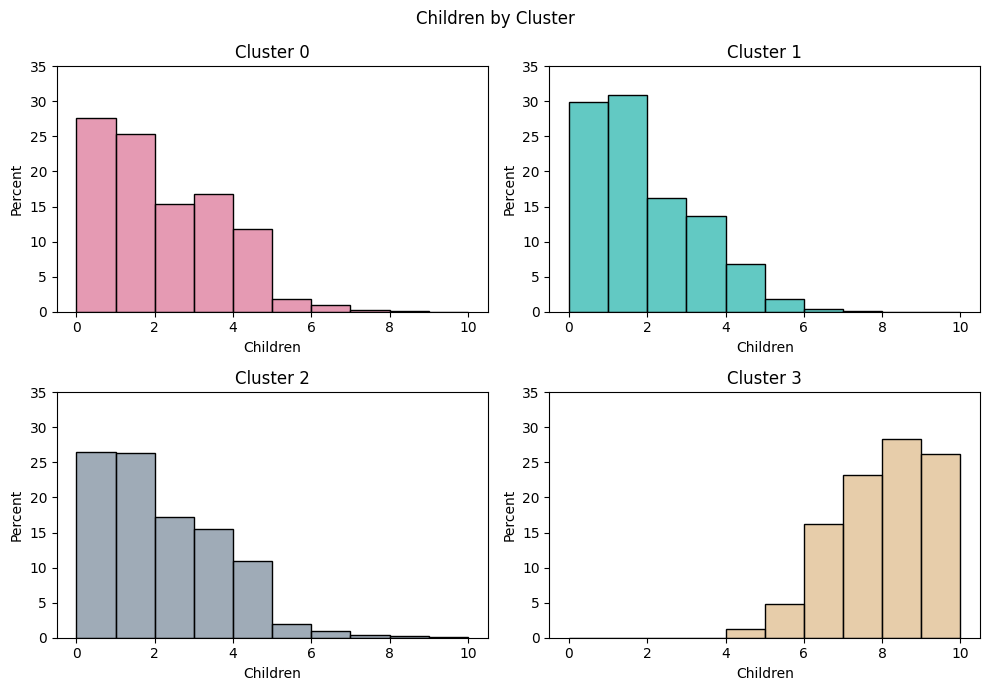


MonthlyCharge
Cluster 0 Average: 153.33
Cluster 1 Average: 160.75
Cluster 2 Average: 225.44
Cluster 3 Average: 170.02


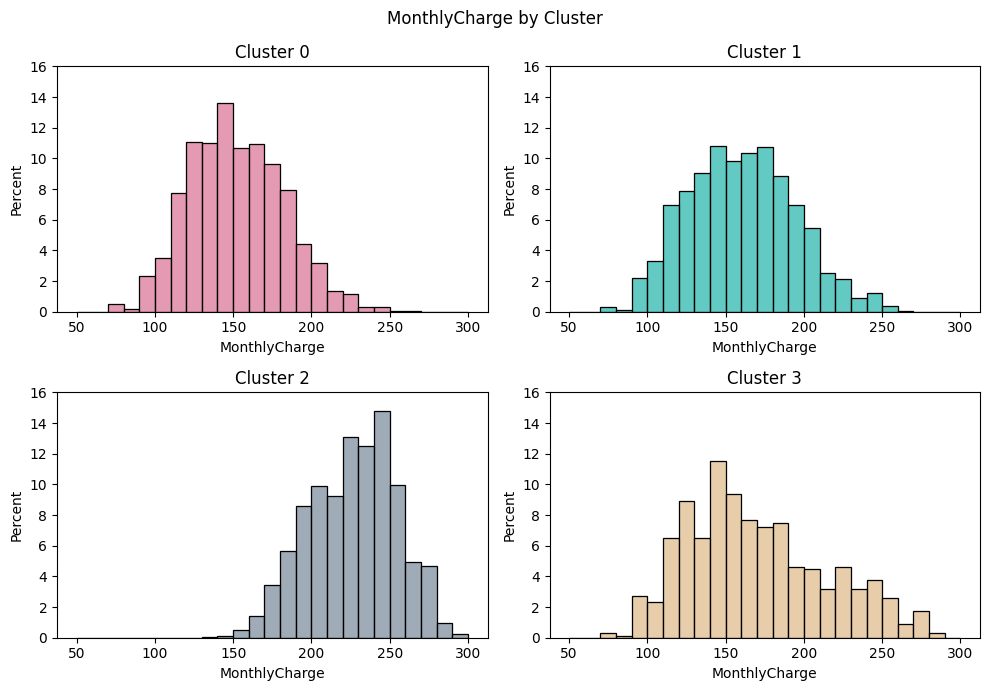

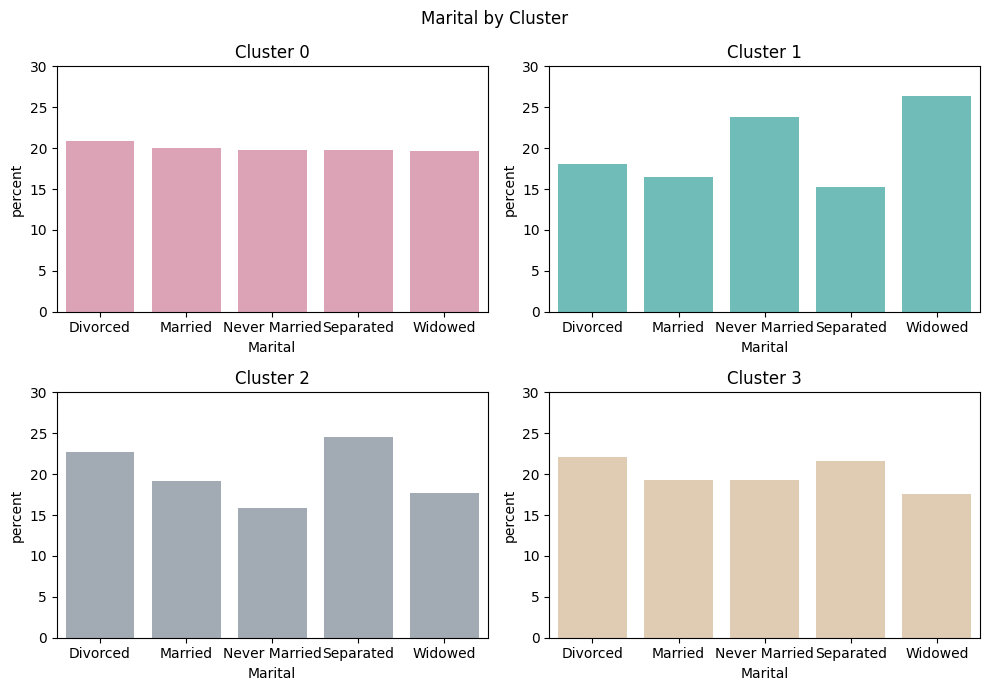

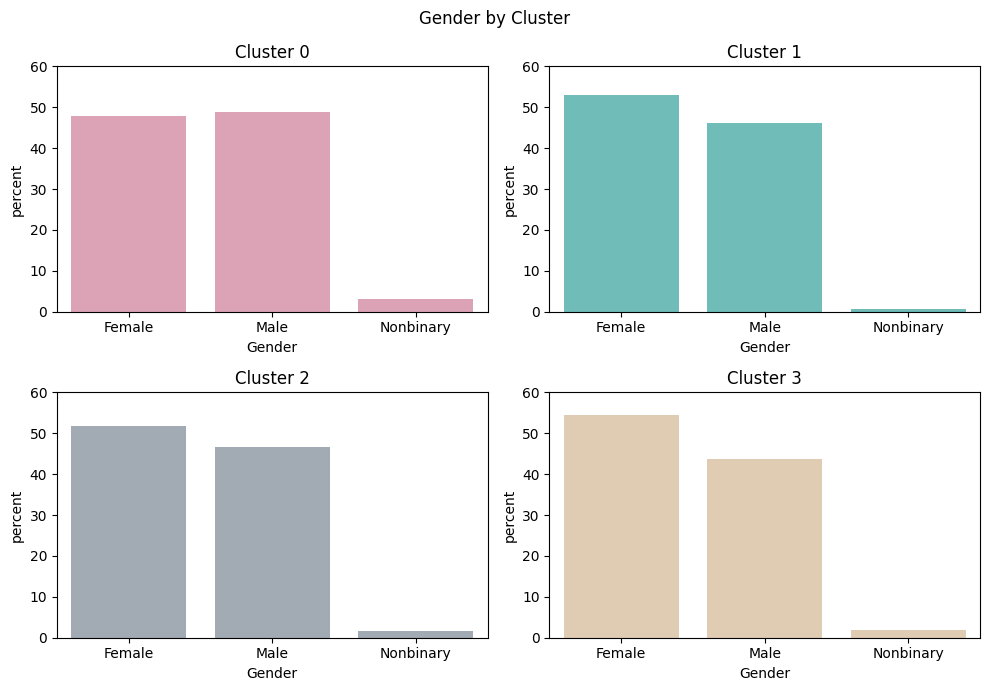

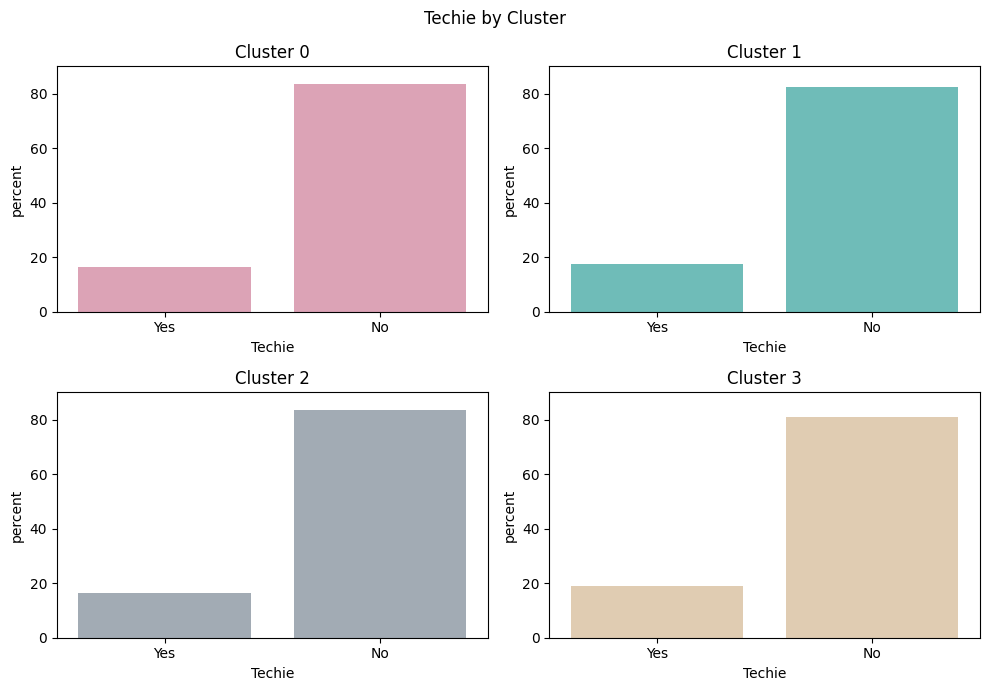

In [11]:
def cluster_histogram(col, bin_count, bin_ranges, y_range):
   """Cluster histogram: 
      Creates histograms that use percentages to measure different characteristics
        of clusters. Uses numeric valuees
   """
   # all clusters are displayed in 1 plot for comparison
   print(f"\n{col}")
   plt.figure(figsize=(10, 7))
   plt.suptitle(f"{col} by Cluster")
   for i in range (0,4):
      values = filtered_df.loc[filtered_df['Cluster'] == i, col]
      plt.subplot(2, 2 ,i+1)
      plt.ylim(y_range)
      sns.histplot(data=filtered_df , x=values, 
                     bins=bin_count, binrange=bin_ranges, 
                     stat='percent', color=cluster_colors[i], alpha=plot_alpha).set_title(f"Cluster {i}")
      print(f"Cluster {i} Average: {values.mean().round(2)}")
   plt.tight_layout()
   plt.show()
def cluster_countplot(col, ordering, y_range):
   """Cluster Countplot:
      Like cluster histogram, but creates a countplot for the categorical variables
   """
   # all clusters are displayed in 1 plot for comparison, with maintained ordering of categories
   plt.figure(figsize=(10, 7))
   plt.suptitle(f"{col} by Cluster")
   for i in range (0,4):
      plt.subplot(2, 2 ,i+1)
      plt.ylim(y_range)
      sns.countplot(data=filtered_df , x=filtered_df.loc[filtered_df['Cluster'] == i, col],
                     order=ordering, stat='percent', color=cluster_colors[i],
                       alpha=plot_alpha).set_title(f"Cluster {i}")
   plt.tight_layout()
   plt.show()
#  set transparency of histograms [In-Text Citation: (JohanC & Hager, 2021)]
plot_alpha = 0.7
cluster_colors = ['palevioletred', 'lightseagreen', 'lightslategray', 'burlywood']
cluster_histogram('Income', 20, (0, 110000), (0, 15))
cluster_histogram('Age', 20, (15, 90), (0, 10))
cluster_histogram('Children', 10, (0, 10), (0, 35))
cluster_histogram('MonthlyCharge', 25, (50, 300), (0, 16))

cluster_countplot('Marital', ['Divorced', 'Married', 'Never Married', 'Separated', 'Widowed'], (0, 30))
cluster_countplot('Gender', ['Female', 'Male', 'Nonbinary'], (0, 60))
cluster_countplot('Techie', ['Yes', 'No'], (0, 90))

<style type="text/css">
    h1,h2,h3,h4{
        margin-bottom: 0px;
    }
    p,ul{
        margin-bottom: 20px;
    }
    h2{
        margin-left: 10px;
        margin-top: 15px;
    }
    h3{
        margin-left: 20px;
        margin-top: 10px;
    }
    h4{
        margin-left: 30px;
        margin-top: 10px;
    }
    p{
        margin-left: 40px;
        margin-top: 7px;
    }
    li{
        margin-left: 40px;
        margin-top: 5px;
    }
</style>
<p>&nbsp; &nbsp; With this information we can create profiles based on values that are distinct to a specific
cluster. Characteristics that are average or not unique to a cluster are not listed:
<ul>
<li>Cluster 0<ul>
<li>Low Income</li>
<li>Highest count of Nonbinary customers (over 3%)</li>
</ul></li>
<li>Cluster 1<ul>
<li>High Income</li>
<li>More likely to be widowed or never married</li>
</ul></li>
<li>Cluster 2<ul>
<li>Few Children</li>
<li>High Monthly Charge</li>
<li>Higher counts of separated customers</li>
</ul></li>
<li>Cluster 3<ul>
<li>Many Children</li>
<li>Varied Monthly Charge</li>
<li>More Female than Male</li>
</ul></li>
</ul></p>
<h4>3. Limitation</h4>
<p>&nbsp; &nbsp; There was some difficulty in determining the number of clusters that were ‘optimal’
for the analysis. Only using the cutoff method could have resulted in 13 clusters with a
weaker silhouette score of 0.073. While there is a better dispersion of customers with a
greater count of clusters, it would also be harder to visualize the difference between
clusters with so many groups. And again, the differences between groups would already be
hard to determine with the silhouette score so close to zero. Thinking beyond the analytical
aspect, a smaller number of clusters could be better for stakeholders understanding and
retention. Only four clusters were used as they were easier to plot together and maintained
a greater score of quality and separation at 0.108.</p>
<h4>4. Course of Action</h4>
<p>&nbsp; &nbsp; The telecommunications company can use this analysis to market towards the
personalities of its users with lesser monthly bills and potentially boost revenue from these
groups. Targeted marketing and services will also help with retention as the customer will
feel valued by a company who knows them. My recommendation would be to maintain the
current status and services with customers who fall into the demographic of cluster two
since they are already paying high monthly fees and to focus on customers from clusters
zero, one, and three. They can increase revenue from cluster three by providing a family
discount for additional services and products and boost profits for clusters zero and one by
emphasizing the benefits of the company’s products and providing tiered service levels.</p>
<h3>G. Sources for Third-Party Code</h3>
<p>Bhardwaj, A. (2020, May 26). Silhouette Coefficient. Medium.
<a href="https://medium.com/towards-data-science/silhouette-coefficient-validating-clustering-techniques-e976bb81d10c">
https://medium.com/towards-data-science/silhouette-coefficient-validating-clustering-techniques-e976bb81d10c</a>

dmmmmd & FBruzzesi. (2020, October 1). How can I convert the StandardScaler()
transformation back to dataframe? Stack Overflow.
https://stackoverflow.com/questions/64161419/how-can-i-convert-the-standardscaler-transformation-back-to-dataframe

GeeksforGeeks. (2021, December 19). How to Standardize Data in a Pandas DataFrame?
GeeksforGeeks. https://www.geeksforgeeks.org/how-to-standardize-data-in-a-pandas-dataframe/

JohanC, & Hager, P. (2021, August 5). Why do seaborn countplots and histplots display the
same hexadecimal color differently? Stack Overflow.
https://stackoverflow.com/questions/68670406/why-do-seaborn-countplots-and-histplots-display-the-same-hexadecimal-color-diffe

Rocketq & Lucky Suman. (2018, May 16). Pandas Concat increases number of rows. Stack
Overflow. https://stackoverflow.com/questions/50368145/pandas-concat-increases-number-of-rows

Sampaio, C. (2023, November 16). Definitive Guide to Hierarchical Clustering with Python
and Scikit-Learn. Stack Abuse. https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/

scikit-learn. (n.d.). AgglomerativeClustering. Scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

tenebris silentio, & Dabas, A. (2021, June 21). Python Pandas - trying to get counts and
percentages for all fields - Can only get one or the other. Stack Overflow.
https://stackoverflow.com/questions/68068291/python-pandas-trying-to-get-counts-and-percentages-for-all-fields-can-only-g</p>

<h3>H. Sources</h3>
<p>GeeksforGeeks. (2024, March 20). ML | Types of Linkages in Clustering. GeeksforGeeks.<a href="https://www.geeksforgeeks.org/ml-types-of-linkages-in-clustering/">
https://www.geeksforgeeks.org/ml-types-of-linkages-in-clustering/</a>

Gupta, A. (2019, October 29). One Hot EnCoding | Kaggle.
https://www.kaggle.com/discussions/getting-started/114797

Sampaio, C. (2023, November 16). Definitive Guide to Hierarchical Clustering with Python
and Scikit-Learn. Stack Abuse. https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/

SPSS. (n.d.). Hierarchical Cluster Analysis. https://spssanalysis.com/hierarchical-cluster-analysis-in-spss/#:~:text=Here%20are%20the%20key%20assumptions,using%20the%20chosen%20distance%20metric.

Tambe, K. (2019, April 2). Important notes on cluster analysis - Kirti Tambe - Medium.
Medium. https://medium.com/@kirtitambe17/important-notes-on-cluster-analysis-ac0abc65a337